## Network Charts

This notebook is for structuring data to visualise a network using the networkx package.

This code template is taken from https://github.com/Lemon-Soup/NetworkChart

### Install Required Packages & Import Data

In [14]:
#Prerequisites

import sys
!{sys.executable} -m pip install --user networkx
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user pandas

import networkx as nx
import numpy as np
import pandas as pd

from pandas import DataFrame

import matplotlib.pyplot as plt

# Read in Source File - NB this must match the schema requirements

df_InputData = pd.read_excel("sim_data.xlsx")
Src_Column = 'Source ID'
Tgt_Column = 'Target ID'


### Create Coordinates for Nodes in Network

In [3]:
import json

In [4]:
df_InputData[Src_Column]

Series([], Name: Source ID, dtype: object)

In [15]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


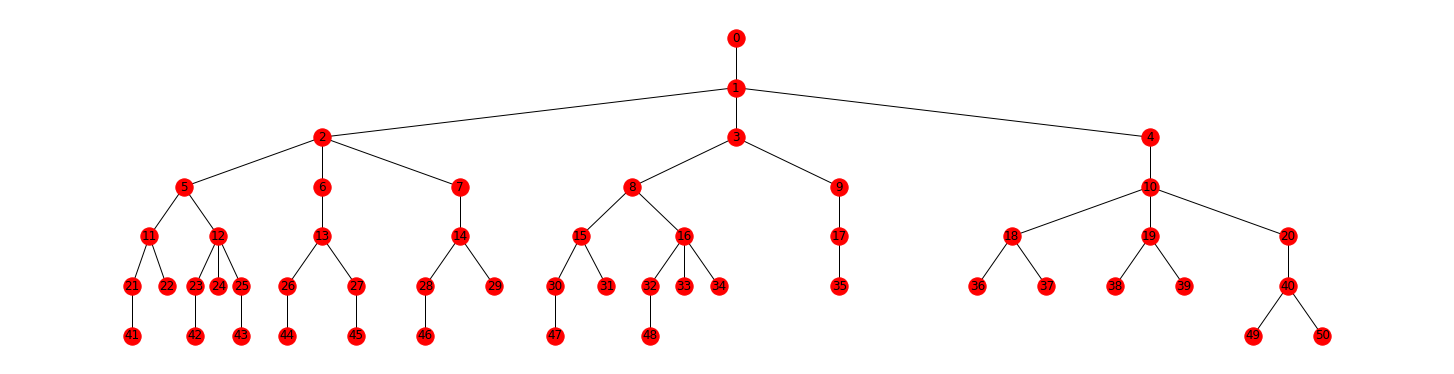

In [16]:
plt.figure(figsize = [20, 5])
G=nx.Graph()
G.add_edges_from([(0, 1), (1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13), (7, 14), (8, 15), (8, 16), (9, 17), (10, 18), (10,19), (10, 20), (11, 21), (11, 22),
                 (12, 23), (12, 24), (12, 25), (13, 26), (13, 27), (14, 28), (14, 29), (15, 30), (15, 31), (16, 32),
                 (16, 33), (16, 34), (17, 35), (18, 36), (18, 37), (19, 38), (19, 39), (20, 40), (21, 41), (23, 42), 
                  (25, 43), (26, 44), (27, 45), (28, 46), (30, 47), (32, 48), (40, 49), (40, 50)])
pos = hierarchy_pos(G,0)    
nx.draw(G, pos=pos, with_labels=True, node_color='r')

In [51]:
t = np.arange(0, 50, 1)  

In [52]:
df = pd.DataFrame(columns = ['Node'])

In [29]:
df['Node'] = np.array(G.nodes().data()).T[0]

In [30]:
for i in t:
    df[i] = np.array(['S']*len(df))
df

,Node,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
1,1,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
2,2,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
3,3,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
4,4,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
5,5,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
6,6,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
7,7,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
8,8,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
9,9,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S


In [40]:
cols = len(df.columns)
for i, arr in enumerate(results_df.T[0]):

    if len(arr) == 2:
        index = t.index(arr[1])
        for j in t[index:]:
            df[j][i] = 'I'
            
    elif len(arr) == 3:
        index1 = t.index(arr[1])
        index2 = t.index(arr[2])
        for k in t[index1:index2]:
            df[k][i] = 'I'
        for l in t[index2:]:
            df[l][i] = 'R'  

<ipython-input-40-16891d6233e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i] = 'I'
<ipython-input-40-16891d6233e0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[l][i] = 'R'
<ipython-input-40-16891d6233e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = 'I'


In [31]:
df = df.T.iloc[1:]

In [32]:
df['time'] = df.index

In [33]:
a = np.array([2, 3, 4, 5])

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,time
0,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,0
1,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,1
2,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,2
3,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,3
4,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,4
5,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,5
6,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,6
7,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,7
8,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,8
9,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,9


In [42]:
e = np.array(G.edges()).T

In [43]:
df_InputData[Src_Column] = e[0]

In [44]:
df_InputData[Tgt_Column] = e[1]

In [45]:
df_InputData

,Source ID,Target ID
0,0,1
1,1,2
2,1,3
3,1,4
4,2,5
5,2,6
6,2,7
7,3,8
8,3,9
9,4,10


In [46]:
#Nodes are positioned using the Fruchterman-Reingold force-directed algorithm.
Q = nx.Graph()
arr_SrcTgt= np.array(df_InputData[[Src_Column, Tgt_Column]])
Q.add_edges_from(arr_SrcTgt)
dict_Coords = nx.kamada_kawai_layout(Q)

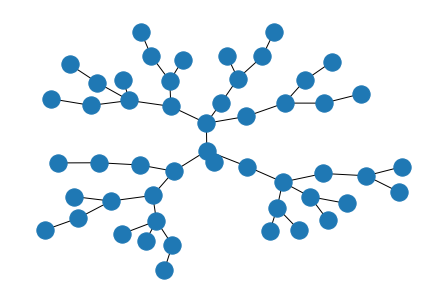

In [47]:
nx.draw(Q, pos = nx.kamada_kawai_layout(Q))

In [48]:
df_Raw_Coords = DataFrame(dict_Coords)
df_Raw_Coords = df_Raw_Coords.T
df_Raw_Coords.columns = ['X','Y']
df_Raw_Coords['NodeName'] = df_Raw_Coords.index

#Add in a "Node Name" for cases where nodes do not link with another named node

df_Raw_Coords.fillna("Not Specified", inplace = True)

### Join Coordinates to the Main Dataset

In [49]:
#Create bridge between main dataset and coordinates

arr_SrcTgt2 = arr_SrcTgt.reshape(1,(len(arr_SrcTgt)*2))
arr_SrcTgt2 = arr_SrcTgt2.reshape(-1)
df_SrcTgt = DataFrame(arr_SrcTgt2,columns=['NodeName'])
arr_Index = []
for i in range(1,(len(arr_SrcTgt)+1)):
        arr_Index.append(i)
        arr_Index.append(i)
df_SrcTgt['c_Index'] = arr_Index

#Join the datasets

df_InputData.index = df_InputData.index + 1

Merge_1 = pd.merge(
    left=df_SrcTgt,
    right=df_InputData,
    how="inner",
    left_on=df_SrcTgt['c_Index'],
    right_index=True,
)

df_MainDat = DataFrame(Merge_1)
df_MainDat = df_MainDat.drop(columns=['key_0'])

Merge_2 = pd.merge(
    left=df_Raw_Coords,
    right=df_MainDat,
    how="left",
    left_on=df_Raw_Coords['NodeName'],
    right_on=df_MainDat['NodeName'],
    suffixes=("", "_y"),
)

df_finaldat = DataFrame(Merge_2)
df_finaldat = df_finaldat.drop(columns=['key_0','NodeName_y'])

### Output Excel File

In [50]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('NetData.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df_finaldat.to_excel(writer, sheet_name='Network')
df.to_excel(writer, sheet_name='Nodes')
df.T.to_excel(writer, sheet_name='Nodes.T')

# Close the Pandas Excel writer and output the Excel file.
writer.save()